In [1]:
# First, we import libraries and the selected dataset
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('sbab033').getOrCreate()



In [2]:
df1= spark.read.csv('heart_failure_clinical_records_dataset 1.csv',header=True,inferSchema=True)
df2= spark.read.csv('Heart failure2.csv',header=True,inferSchema=True)


In [3]:
df1.printSchema()

root
 |-- Patient's id: string (nullable = true)
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



In [4]:
df2.printSchema()

root
 |-- Patient's id: string (nullable = true)
 |-- smoking: string (nullable = true)



In [5]:
df1.show(5)

+------------+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+----+-----------+
|Patient's id| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|time|DEATH_EVENT|
+------------+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+----+-----------+
|         PA1|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|   4|          1|
|         PA2|55.0|      0|                    null|       0|               38|                  0|     null|             1.1|         136|  1|   6|          1|
|         PA3|65.0|      0|                     146|       0|               20|                  0| 162000.0|             1.3|         129|  1|   7|          1|
|         PA4|50.0|      1|       

In [6]:
df1=df1.toPandas()
df2 = df2.toPandas()

In [7]:
df1.head()

,Patient's id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,PA1,75.0,0,582.0,0,20,1,265000.0,1.9,130,1,4,1
1,PA2,55.0,0,NaN,0,38,0,NaN,1.1,136,1,6,1
2,PA3,65.0,0,146.0,0,20,0,162000.0,1.3,129,1,7,1
3,PA4,50.0,1,111.0,0,20,0,210000.0,1.9,137,1,7,1
4,PA5,65.0,1,160.0,1,20,0,327000.0,2.7,116,0,8,1


In [8]:
df2.head()

,Patient's id,smoking
0,PA1,No
1,PA2,No
2,PA3,Yes
3,PA4,No
4,PA5,No


In [9]:
df1.columns

Index(['Patient's id', 'age', 'anaemia', 'creatinine_phosphokinase',
       'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'time', 'DEATH_EVENT'],
      dtype='object')

In [10]:
df1.shape

(299, 13)

In [11]:
df2.columns

Index(['Patient's id', 'smoking'], dtype='object')

In [12]:
df2.shape

(299, 2)

In [13]:
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
count,299.000000,299.000000,298.000000,299.000000,299.000000,299.000000,297.000000,299.00000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,557.412752,0.418060,38.083612,0.351171,262931.625320,1.39388,136.625418,0.648829,130.260870,0.32107
std,11.894809,0.496107,875.000087,0.494067,11.834841,0.478136,97856.712298,1.03451,4.412477,0.478136,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,4.000000,0.00000
25%,51.000000,0.000000,115.750000,0.000000,30.000000,0.000000,212000.000000,0.90000,134.000000,0.000000,73.000000,0.00000
50%,60.000000,0.000000,249.500000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303000.000000,1.40000,140.000000,1.000000,203.000000,1.00000
max,95.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,285.000000,1.00000


In [14]:
df2.describe()

,Patient's id,smoking
count,299,299
unique,299,2
top,PA139,No
freq,1,203


In [15]:
print(df1.isnull().values.any())

True


In [16]:
print(df1.isnull().sum().sum())

3


In [17]:
for col in df1.columns:
    print(col, str(round(100* df1[col].isnull().sum() / len(df1), 2)) + '%')

Patient's id 0.0%
age 0.0%
anaemia 0.0%
creatinine_phosphokinase 0.33%
diabetes 0.0%
ejection_fraction 0.0%
high_blood_pressure 0.0%
platelets 0.67%
serum_creatinine 0.0%
serum_sodium 0.0%
sex 0.0%
time 0.0%
DEATH_EVENT 0.0%


In [18]:
df1.describe(percentiles=[.10,.5,.90])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
count,299.000000,299.000000,298.000000,299.000000,299.000000,299.000000,297.000000,299.00000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,557.412752,0.418060,38.083612,0.351171,262931.625320,1.39388,136.625418,0.648829,130.260870,0.32107
std,11.894809,0.496107,875.000087,0.494067,11.834841,0.478136,97856.712298,1.03451,4.412477,0.478136,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,4.000000,0.00000
10%,45.000000,0.000000,67.400000,0.000000,25.000000,0.000000,153000.000000,0.80000,132.000000,0.000000,26.800000,0.00000
50%,60.000000,0.000000,249.500000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,115.000000,0.00000
90%,75.400000,1.000000,1199.900000,1.000000,60.000000,1.000000,372200.000000,2.10000,141.200000,1.000000,244.000000,1.00000
max,95.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,285.000000,1.00000


In [19]:
df3=df1[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]
df4=df1[["anaemia","diabetes","high_blood_pressure","sex","DEATH_EVENT"]]

In [20]:
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582.0,20,265000.0,1.9,130,4
1,55.0,NaN,38,NaN,1.1,136,6
2,65.0,146.0,20,162000.0,1.3,129,7
3,50.0,111.0,20,210000.0,1.9,137,7
4,65.0,160.0,20,327000.0,2.7,116,8


In [21]:
df4.head()

,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT
0,0,0,1,1,1
1,0,0,0,1,1
2,0,0,0,1,1
3,1,0,0,1,1
4,1,1,0,0,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df3),
            columns=df3.columns, index=df3.index)

In [23]:
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,NaN,0.363636,NaN,0.067416,0.657143,0.007117
2,0.454545,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017841,0.090909,0.365984,0.247191,0.085714,0.014235


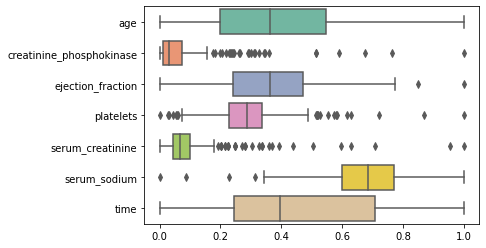

In [24]:
import seaborn as sns
ax = sns.boxplot(data=df3, orient="h", palette="Set2")

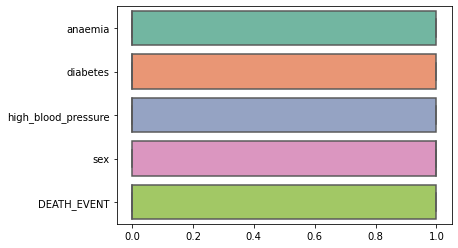

In [25]:
ax = sns.boxplot(data=df4, orient="h", palette="Set2")

In [26]:
for col in df3.columns:
  median = df3[col].median()
  df3[col].fillna(median, inplace=True)
else:
  print("Finally finished!")
print(df3.isnull().values.any())

Finally finished!
False


In [27]:
print(df3.isnull().values.any())

False


In [28]:
for col in df3.columns:
    print(col, str(round(100* df3[col].isnull().sum() / len(df3), 2)) + '%')

age 0.0%
creatinine_phosphokinase 0.0%
ejection_fraction 0.0%
platelets 0.0%
serum_creatinine 0.0%
serum_sodium 0.0%
time 0.0%


In [29]:
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117
2,0.454545,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017841,0.090909,0.365984,0.247191,0.085714,0.014235


In [30]:
df3.describe(percentiles=[.10,.5,.90])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.378798,0.069460,0.364903,0.288308,0.100436,0.675012,0.449327
std,0.216269,0.113779,0.179316,0.118230,0.116237,0.126071,0.276207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.090909,0.005808,0.166667,0.155049,0.033708,0.542857,0.081139
50%,0.363636,0.029496,0.363636,0.287186,0.067416,0.685714,0.395018
90%,0.643636,0.153223,0.696970,0.420051,0.179775,0.805714,0.854093
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
import numpy as np

In [32]:
#replacing outliers and extreams with null values
df3.loc[df3.platelets > 0.9, 'platelets'] = np.nan
df3.loc[df3.creatinine_phosphokinase > 0.9, 'creatinine_phosphokinase'] = np.nan
df3.loc[df3.ejection_fraction > 0.9, 'ejection_fraction'] = np.nan
df3.loc[df3.serum_creatinine > 0.9, 'serum_creatinine'] = np.nan
df3.loc[df3.serum_sodium < 0.1, 'serum_sodium'] = np.nan

In [33]:
# replacing null values with median
for col in df3.columns:
  median = df3[col].median()
  df3[col].fillna(median, inplace=True)
else:
  print("Finally finished!")
print(df3.isnull().values.any())

Finally finished!
False


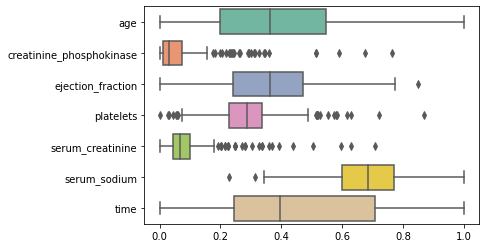

In [34]:
ax = sns.boxplot(data=df3, orient="h", palette="Set2")

In [35]:
df3=df3.drop(['age'],axis=1)
df= pd.concat([df1[["Patient's id","age"]],df3,df4],axis=1)
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT
0,PA1,75.0,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,1
1,PA2,55.0,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117,0,0,0,1,1
2,PA3,65.0,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1
3,PA4,50.0,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,1
4,PA5,65.0,0.017841,0.090909,0.365984,0.247191,0.685714,0.014235,1,1,0,0,1


In [36]:
from pandas.api.types import CategoricalDtype
classes = df2['smoking'].unique()
smoke_types = CategoricalDtype(categories=classes)
df2['smoking'] = df2['smoking'].astype(smoke_types).cat.codes.astype('long')
df2.head()

,Patient's id,smoking
0,PA1,0
1,PA2,0
2,PA3,1
3,PA4,0
4,PA5,0


In [37]:
df2.describe()

,smoking
count,299.00000
mean,0.32107
std,0.46767
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [38]:
print(df2.isnull().values.any())

False


In [39]:
df = df.merge(df2, on="Patient's id")

In [40]:
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
0,PA1,75.0,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,1,0
1,PA2,55.0,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117,0,0,0,1,1,0
2,PA3,65.0,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,PA4,50.0,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,1,0
4,PA5,65.0,0.017841,0.090909,0.365984,0.247191,0.685714,0.014235,1,1,0,0,1,0


In [41]:
df=df.sort_values(by=['age'])
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
269,PA270,40.0,0.072796,0.318182,0.238696,0.056180,0.542857,0.854093,0,1,0,1,0,0
232,PA233,40.0,0.013804,0.318182,0.278700,0.044944,0.685714,0.729537,1,0,0,1,0,0
180,PA181,40.0,0.059253,0.242424,0.336889,0.044944,0.657143,0.512456,0,1,0,1,0,0
242,PA243,40.0,0.008725,0.318182,0.278700,0.067416,0.657143,0.740214,0,0,0,1,0,1
248,PA249,40.0,0.078265,0.318182,0.334465,0.056180,0.828571,0.747331,0,0,0,1,0,1


In [42]:
df=df.sort_values(by=['age'])
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
269,PA270,40.0,0.072796,0.318182,0.238696,0.056180,0.542857,0.854093,0,1,0,1,0,0
232,PA233,40.0,0.013804,0.318182,0.278700,0.044944,0.685714,0.729537,1,0,0,1,0,0
180,PA181,40.0,0.059253,0.242424,0.336889,0.044944,0.657143,0.512456,0,1,0,1,0,0
242,PA243,40.0,0.008725,0.318182,0.278700,0.067416,0.657143,0.740214,0,0,0,1,0,1
248,PA249,40.0,0.078265,0.318182,0.334465,0.056180,0.828571,0.747331,0,0,0,1,0,1


In [43]:
df.tail()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
36,PA37,90.0,0.004818,0.545455,0.243545,0.056180,0.600000,0.092527,1,1,0,1,1,0
5,PA6,90.0,0.003125,0.393939,0.216875,0.179775,0.542857,0.014235,1,0,1,1,1,1
30,PA31,94.0,0.072796,0.363636,0.288833,0.149438,0.600000,0.081851,0,1,1,1,1,0
55,PA56,95.0,0.045318,0.242424,0.528428,0.168539,0.542857,0.163701,1,0,0,1,1,0
26,PA27,95.0,0.011590,0.393939,0.207177,0.056180,0.714286,0.071174,1,0,1,0,1,0


In [44]:
df= df.drop(["Patient's id"], axis=1)

In [45]:
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
269,40.0,0.072796,0.318182,0.238696,0.056180,0.542857,0.854093,0,1,0,1,0,0
232,40.0,0.013804,0.318182,0.278700,0.044944,0.685714,0.729537,1,0,0,1,0,0
180,40.0,0.059253,0.242424,0.336889,0.044944,0.657143,0.512456,0,1,0,1,0,0
242,40.0,0.008725,0.318182,0.278700,0.067416,0.657143,0.740214,0,0,0,1,0,1
248,40.0,0.078265,0.318182,0.334465,0.056180,0.828571,0.747331,0,0,0,1,0,1


AxesSubplot(0.125,0.125;0.62x0.755)


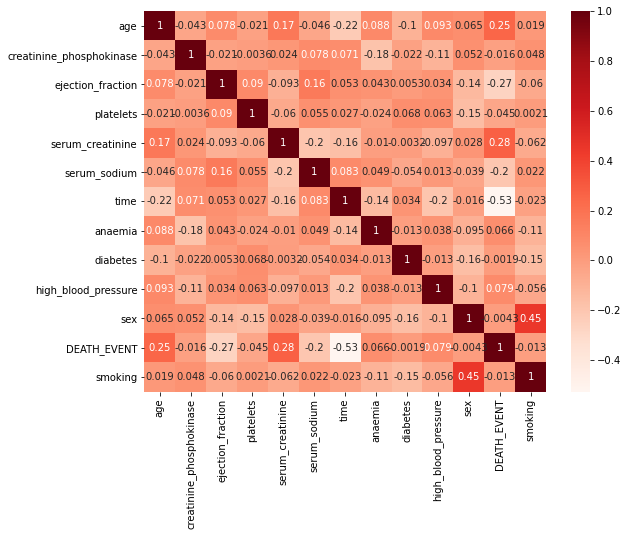

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
print (sns.heatmap(df.corr(), cmap='Reds', annot=True))
#plt.figure(figsize=(9,7))

In [47]:
df.to_csv('cleaned_data.csv', index=False)

In [48]:
x= df["time"].to_numpy
y= df["serum_creatinine"].to_numpy

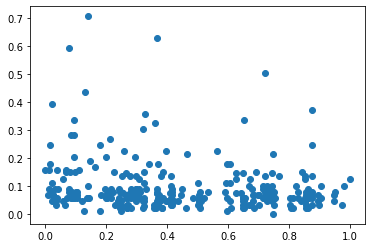

In [49]:
plt.scatter(df["time"],df["serum_creatinine"])

<AxesSubplot:>

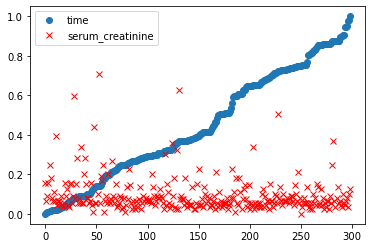

In [50]:
pattern1= df[["time","serum_creatinine"]]
pattern1.plot(style=['o','rx'])

<AxesSubplot:>

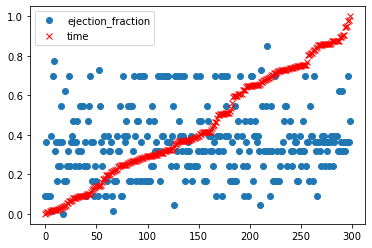

In [51]:
pattern2= df[["ejection_fraction","time"]]
pattern2.plot(style=['o','rx'])

<AxesSubplot:>

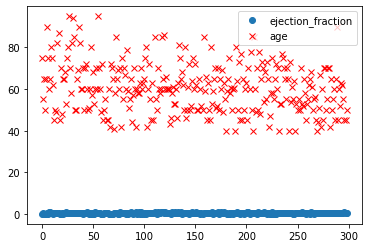

In [52]:
pattern3= df[["ejection_fraction","age"]]
pattern3.plot(style=['o','rx'])

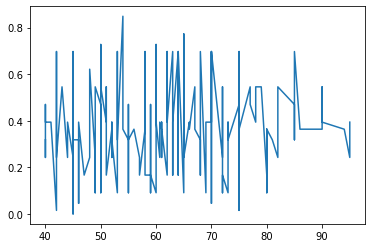

In [53]:
y=df["ejection_fraction"]
x=df["age"]
plt.plot(x,y)

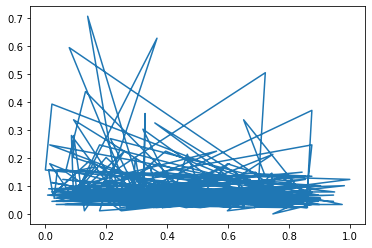

In [54]:
plt.plot(df["time"],df["serum_creatinine"])